In [1]:
import pandas as pd
import re

In [2]:
df= pd.read_csv('./data/sentence_data.csv')

# Preprocessing

1) Drop all Nan row

In [3]:
#drop all Nan
df.dropna(inplace= True)
df

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
1,Vienna,Austria,Breakfast options are limited Personally i wo...,Personally i would choose a hotel closer to an...
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,The room was a great size for a city hotel
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,The shower was great Lovely old building with ...
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,The room was small and the bathroom was minute
...,...,...,...,...
968664,el Besòs i el Maresme,Spain,Reception area very shabby Walls in bedroom w...,Walls in bedroom were so thin you could hear e...
968665,Vienna,Austria,I was informed when I checked in that I would...,I was informed when I checked in that I would ...
968666,Amsterdam,Netherlands,Could hear other people shutting doors but di...,Could hear other people shutting doors but did...
968667,Vienna,Austria,Hotel is showing signs of wear Room furniture...,Room furniture was worn and shabby bed amazing...


In [4]:
samples=df.copy(deep=True)
sample=samples[:50000]
sample

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
1,Vienna,Austria,Breakfast options are limited Personally i wo...,Personally i would choose a hotel closer to an...
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,The room was a great size for a city hotel
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,The shower was great Lovely old building with ...
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,The room was small and the bathroom was minute
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,t self serve but it isn t a big deal
49996,Vienna,Austria,Construction across the road not the hotels f...,I would stay here again if i went back to Vienna
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,The rooms we booked three were all very small ...
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,All three rooms had a very strong smell of mould


In [5]:
sample['sent_list']=sample.sent_list.str.lower()

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
sample

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,have stayed before i e 9yrs ago shop no longer...
1,Vienna,Austria,Breakfast options are limited Personally i wo...,personally i would choose a hotel closer to an...
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,the room was a great size for a city hotel
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,the shower was great lovely old building with ...
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,the room was small and the bathroom was minute
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,t self serve but it isn t a big deal
49996,Vienna,Austria,Construction across the road not the hotels f...,i would stay here again if i went back to vienna
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,the rooms we booked three were all very small ...
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,all three rooms had a very strong smell of mould


In [7]:
data= sample.copy()
data=data.sent_list.to_frame().values.tolist()
data

[['have stayed before i e 9yrs ago shop no longer also bar changed but still nice'],
 ['personally i would choose a hotel closer to another safer subway station if i knew the city and were staying longer'],
 ['the room was a great size for a city hotel'],
 ['the shower was great lovely old building with character in a perfect spot free tea and coffee and snacks felt like this happens on weekday mornings superb staff so helpful and efficient'],
 ['the room was small and the bathroom was minute'],
 ['a bedside lamp would have been easier on the eyes than just ceiling spotlights'],
 ['there was low level noise outside the room probably coming from the air'],
 ['conditioning unit take earplugs if you re a light sleeper'],
 ['the bar prices and the rooms were on the small side'],
 ['aircon broken in first room and didn t work in second noisy room from inside hotel and traffic'],
 ['room a little noisy from the evening festivities in the dining room at the weekend'],
 ['the location of the h

2) Removing stopwords and splitting into corpus

In [8]:
from nltk.corpus import stopwords
import nltk 

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['e', 'etc','u','hotel','always', 'know', 'i', 'have', 'would', 'take', 'choose', 'first', 'second', 'lovely', 'will', 'definitely', 'longer', 'stayed', 'also'])
stop_words.sort()
print(stop_words)
print(len(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'also', 'always', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'choose', 'couldn', "couldn't", 'd', 'definitely', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'e', 'each', 'etc', 'few', 'first', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'hotel', 'how', 'i', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'know', 'll', 'longer', 'lovely', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 

In [9]:
sample['sent_list']= sample['sent_list'].apply(lambda x: [word for word in x.split() if word not in stop_words])

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
sample

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[9yrs, ago, shop, bar, changed, still, nice]"
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[personally, closer, another, safer, subway, s..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[room, great, size, city]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[shower, great, old, building, character, perf..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[room, small, bathroom, minute]"
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,"[self, serve, big, deal]"
49996,Vienna,Austria,Construction across the road not the hotels f...,"[stay, went, back, vienna]"
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,"[rooms, booked, three, small, one, particular,..."
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,"[three, rooms, strong, smell, mould]"


In [11]:
sample['sent_list']= sample['sent_list'].apply(lambda x: [w for w in x if re.search('^[a-z]+$', w)])

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
sample

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[ago, shop, bar, changed, still, nice]"
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[personally, closer, another, safer, subway, s..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[room, great, size, city]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[shower, great, old, building, character, perf..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[room, small, bathroom, minute]"
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,"[self, serve, big, deal]"
49996,Vienna,Austria,Construction across the road not the hotels f...,"[stay, went, back, vienna]"
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,"[rooms, booked, three, small, one, particular,..."
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,"[three, rooms, strong, smell, mould]"


In [13]:
doc=sample['sent_list'].values.tolist()
doc

[['ago', 'shop', 'bar', 'changed', 'still', 'nice'],
 ['personally',
  'closer',
  'another',
  'safer',
  'subway',
  'station',
  'knew',
  'city',
  'staying'],
 ['room', 'great', 'size', 'city'],
 ['shower',
  'great',
  'old',
  'building',
  'character',
  'perfect',
  'spot',
  'free',
  'tea',
  'coffee',
  'snacks',
  'felt',
  'like',
  'happens',
  'weekday',
  'mornings',
  'superb',
  'staff',
  'helpful',
  'efficient'],
 ['room', 'small', 'bathroom', 'minute'],
 ['bedside', 'lamp', 'easier', 'eyes', 'ceiling', 'spotlights'],
 ['low', 'level', 'noise', 'outside', 'room', 'probably', 'coming', 'air'],
 ['conditioning', 'unit', 'earplugs', 'light', 'sleeper'],
 ['bar', 'prices', 'rooms', 'small', 'side'],
 ['aircon', 'broken', 'room', 'work', 'noisy', 'room', 'inside', 'traffic'],
 ['room',
  'little',
  'noisy',
  'evening',
  'festivities',
  'dining',
  'room',
  'weekend'],
 ['location', 'made'],
 ['neighbourhood', 'si', 'pretty', 'empty', 'options', 'lunch'],
 ['shower

In [14]:
import gensim
bigram = gensim.models.phrases.Phrases(doc, min_count=3, threshold=10)
print(bigram[doc[7]])

['conditioning_unit', 'earplugs', 'light_sleeper']


In [15]:
doc_list=[]
for i in range(50000):
    doc_list.append(bigram[doc[i]])

In [16]:
doc_list

[['ago', 'shop', 'bar', 'changed', 'still', 'nice'],
 ['personally',
  'closer',
  'another',
  'safer',
  'subway_station',
  'knew',
  'city',
  'staying'],
 ['room', 'great', 'size', 'city'],
 ['shower',
  'great',
  'old_building',
  'character',
  'perfect',
  'spot',
  'free',
  'tea_coffee',
  'snacks',
  'felt_like',
  'happens',
  'weekday',
  'mornings',
  'superb',
  'staff',
  'helpful',
  'efficient'],
 ['room', 'small', 'bathroom', 'minute'],
 ['bedside', 'lamp', 'easier', 'eyes', 'ceiling', 'spotlights'],
 ['low_level', 'noise', 'outside', 'room', 'probably', 'coming', 'air'],
 ['conditioning_unit', 'earplugs', 'light_sleeper'],
 ['bar_prices', 'rooms', 'small_side'],
 ['aircon', 'broken', 'room', 'work', 'noisy', 'room', 'inside', 'traffic'],
 ['room',
  'little',
  'noisy',
  'evening',
  'festivities',
  'dining',
  'room',
  'weekend'],
 ['location', 'made'],
 ['neighbourhood', 'si', 'pretty', 'empty', 'options', 'lunch'],
 ['shower', 'box', 'big', 'showers'],
 ['big

In [17]:
sample['sent_list']=doc_list

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
sample

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[ago, shop, bar, changed, still, nice]"
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[personally, closer, another, safer, subway_st..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[room, great, size, city]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[shower, great, old_building, character, perfe..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[room, small, bathroom, minute]"
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,"[self_serve, big_deal]"
49996,Vienna,Austria,Construction across the road not the hotels f...,"[stay, went, back, vienna]"
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,"[rooms, booked, three, small, one, particular,..."
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,"[three, rooms, strong_smell, mould]"


3) Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [20]:
df_lem=sample.copy()

In [21]:
df_lem

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[ago, shop, bar, changed, still, nice]"
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[personally, closer, another, safer, subway_st..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[room, great, size, city]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[shower, great, old_building, character, perfe..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[room, small, bathroom, minute]"
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,"[self_serve, big_deal]"
49996,Vienna,Austria,Construction across the road not the hotels f...,"[stay, went, back, vienna]"
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,"[rooms, booked, three, small, one, particular,..."
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,"[three, rooms, strong_smell, mould]"


In [22]:
df_lem['sent_list']=df_lem['sent_list'].apply(lambda doc: [lemmatizer.lemmatize(w) for w in doc])

In [23]:
df_lem

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[ago, shop, bar, changed, still, nice]"
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[personally, closer, another, safer, subway_st..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[room, great, size, city]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[shower, great, old_building, character, perfe..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[room, small, bathroom, minute]"
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,"[self_serve, big_deal]"
49996,Vienna,Austria,Construction across the road not the hotels f...,"[stay, went, back, vienna]"
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,"[room, booked, three, small, one, particular, ..."
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,"[three, room, strong_smell, mould]"


# 4.1) Create dictionary

In [24]:
import gensim 
from gensim import corpora

<b> 4.1.1) Create list from dataframe <b>

In [25]:
#df2 lemmatise only
doc_lem= df_lem['sent_list'].values.tolist()
doc_lem

[['ago', 'shop', 'bar', 'changed', 'still', 'nice'],
 ['personally',
  'closer',
  'another',
  'safer',
  'subway_station',
  'knew',
  'city',
  'staying'],
 ['room', 'great', 'size', 'city'],
 ['shower',
  'great',
  'old_building',
  'character',
  'perfect',
  'spot',
  'free',
  'tea_coffee',
  'snack',
  'felt_like',
  'happens',
  'weekday',
  'morning',
  'superb',
  'staff',
  'helpful',
  'efficient'],
 ['room', 'small', 'bathroom', 'minute'],
 ['bedside', 'lamp', 'easier', 'eye', 'ceiling', 'spotlight'],
 ['low_level', 'noise', 'outside', 'room', 'probably', 'coming', 'air'],
 ['conditioning_unit', 'earplug', 'light_sleeper'],
 ['bar_prices', 'room', 'small_side'],
 ['aircon', 'broken', 'room', 'work', 'noisy', 'room', 'inside', 'traffic'],
 ['room',
  'little',
  'noisy',
  'evening',
  'festivity',
  'dining',
  'room',
  'weekend'],
 ['location', 'made'],
 ['neighbourhood', 'si', 'pretty', 'empty', 'option', 'lunch'],
 ['shower', 'box', 'big', 'shower'],
 ['bigger',
  'c

<b> 4.1.2) Create dictionary <b>

In [26]:
dict_lem=corpora.Dictionary(doc_lem)

In [27]:
print(dict_lem)

Dictionary(16312 unique tokens: ['ago', 'bar', 'changed', 'nice', 'shop']...)


In [28]:
token_to_id2=dict_lem.token2id
print(type(token_to_id2))
print(token_to_id2)

<class 'dict'>
{'ago': 0, 'bar': 1, 'changed': 2, 'nice': 3, 'shop': 4, 'still': 5, 'another': 6, 'city': 7, 'closer': 8, 'knew': 9, 'personally': 10, 'safer': 11, 'staying': 12, 'subway_station': 13, 'great': 14, 'room': 15, 'size': 16, 'character': 17, 'efficient': 18, 'felt_like': 19, 'free': 20, 'happens': 21, 'helpful': 22, 'morning': 23, 'old_building': 24, 'perfect': 25, 'shower': 26, 'snack': 27, 'spot': 28, 'staff': 29, 'superb': 30, 'tea_coffee': 31, 'weekday': 32, 'bathroom': 33, 'minute': 34, 'small': 35, 'bedside': 36, 'ceiling': 37, 'easier': 38, 'eye': 39, 'lamp': 40, 'spotlight': 41, 'air': 42, 'coming': 43, 'low_level': 44, 'noise': 45, 'outside': 46, 'probably': 47, 'conditioning_unit': 48, 'earplug': 49, 'light_sleeper': 50, 'bar_prices': 51, 'small_side': 52, 'aircon': 53, 'broken': 54, 'inside': 55, 'noisy': 56, 'traffic': 57, 'work': 58, 'dining': 59, 'evening': 60, 'festivity': 61, 'little': 62, 'weekend': 63, 'location': 64, 'made': 65, 'empty': 66, 'lunch': 67,

<b> 4.1.3) TF <b>

In [29]:
vec_lem= [dict_lem.doc2bow(doc) for doc in doc_lem]

In [30]:
vec_lem

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(7, 1), (14, 1), (15, 1), (16, 1)],
 [(14, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(15, 1), (33, 1), (34, 1), (35, 1)],
 [(36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)],
 [(15, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(48, 1), (49, 1), (50, 1)],
 [(15, 1), (51, 1), (52, 1)],
 [(15, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)],
 [(15, 2), (56, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)],
 [(64, 1), (65, 1)],
 [(66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)],
 [(26, 2), (72, 1), (73, 1)],
 [(74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1)],
 [(5, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1)],
 [(88, 1), (89, 1), (90, 1), (91, 

# LDA Mallet Model

In [31]:
import gensim
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os
os.environ.update({'MALLET_HOME':r'/Users/jaslynwong/Softwares/mallet/mallet-2.0.8/'})

# no_topics=10

# update this path
mallet_path = r'/Users/jaslynwong/Softwares/mallet/mallet-2.0.8/bin/mallet' 

# Choosing Optimal Number of the Topics

<b>1) Model with tf vectors - DONT RUN THIS<b>

In [32]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 25):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    lda_lem_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=vec_lem, num_topics=num_topics, id2word=dict_lem, alpha=7, optimize_interval=10)
    coherencemodel = CoherenceModel(model=lda_lem_mallet, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_lem_mallet)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-04-01 13:22:56.299138
#Topics: 2 Score: 0.2370703754777636
#Topics: 3 Score: 0.30516815660298535
#Topics: 4 Score: 0.3486229129843482
#Topics: 5 Score: 0.3868820603505571
#Topics: 6 Score: 0.37249094308272274
#Topics: 7 Score: 0.4121896527783993
#Topics: 8 Score: 0.39912808250727294
#Topics: 9 Score: 0.3771671572899773
#Topics: 10 Score: 0.39650695647578854
#Topics: 11 Score: 0.42470980744790476
#Topics: 12 Score: 0.38356634920523175
#Topics: 13 Score: 0.3983329421564447
#Topics: 14 Score: 0.4049710474606104
#Topics: 15 Score: 0.4085910460728195
#Topics: 16 Score: 0.4044134710999962
#Topics: 17 Score: 0.4242316113268749
#Topics: 18 Score: 0.38876970555749996
#Topics: 19 Score: 0.40184229579950265
#Topics: 20 Score: 0.39962340851446043
#Topics: 21 Score: 0.38843889676747234
#Topics: 22 Score: 0.3835587363005844
#Topics: 23 Score: 0.4039731447065911
#Topics: 24 Score: 0.4073662597400609
2020-04-01 13:27:30.487833


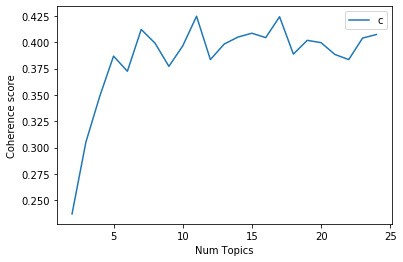

In [34]:
# Show graph

import matplotlib.pyplot as plt

limit=25; start=2#; step=2;
x = range(start, limit)#, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [35]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2371
Num Topics = 3  has Coherence Value of 0.3052
Num Topics = 4  has Coherence Value of 0.3486
Num Topics = 5  has Coherence Value of 0.3869
Num Topics = 6  has Coherence Value of 0.3725
Num Topics = 7  has Coherence Value of 0.4122
Num Topics = 8  has Coherence Value of 0.3991
Num Topics = 9  has Coherence Value of 0.3772
Num Topics = 10  has Coherence Value of 0.3965
Num Topics = 11  has Coherence Value of 0.4247
Num Topics = 12  has Coherence Value of 0.3836
Num Topics = 13  has Coherence Value of 0.3983
Num Topics = 14  has Coherence Value of 0.405
Num Topics = 15  has Coherence Value of 0.4086
Num Topics = 16  has Coherence Value of 0.4044
Num Topics = 17  has Coherence Value of 0.4242
Num Topics = 18  has Coherence Value of 0.3888
Num Topics = 19  has Coherence Value of 0.4018
Num Topics = 20  has Coherence Value of 0.3996
Num Topics = 21  has Coherence Value of 0.3884
Num Topics = 22  has Coherence Value of 0.3836
Num Topics = 23  has C

In [40]:
#14 topics (alpha 7, optimize_interval 10)
#coherence score: 0.404971

from pprint import pprint
optimal_model = model_list[12]  ##change this to num of topics that has the highest coherence score that is ascending
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))


[(0,
  '0.148*"staff" + 0.093*"great" + 0.093*"location" + 0.052*"excellent" + '
  '0.051*"friendly" + 0.044*"good" + 0.039*"nice" + 0.036*"breakfast" + '
  '0.030*"clean" + 0.026*"helpful"'),
 (1,
  '0.166*"room" + 0.090*"comfortable" + 0.073*"clean" + 0.072*"bed" + '
  '0.060*"nice" + 0.037*"good" + 0.027*"view" + 0.024*"quiet" + '
  '0.023*"spacious" + 0.019*"modern"'),
 (2,
  '0.070*"room" + 0.042*"bathroom" + 0.038*"shower" + 0.015*"floor" + '
  '0.015*"towel" + 0.013*"water" + 0.013*"bath" + 0.012*"wifi" + 0.012*"poor" '
  '+ 0.010*"lobby"'),
 (3,
  '0.075*"location" + 0.042*"close" + 0.030*"good" + 0.028*"station" + '
  '0.018*"area" + 0.017*"walk" + 0.016*"great" + 0.015*"metro" + '
  '0.013*"street" + 0.013*"quiet"'),
 (4,
  '0.058*"stay" + 0.019*"thing" + 0.016*"room" + 0.013*"place" + '
  '0.011*"problem" + 0.011*"time" + 0.009*"bit" + 0.009*"asked" + 0.008*"make" '
  '+ 0.008*"day"'),
 (5,
  '0.081*"room" + 0.029*"window" + 0.028*"door" + 0.025*"floor" + '
  '0.023*"bathroo

# Topic Tagging

In [ ]:
#0 - room view
#1 - amenities of room
#2 - front desk service
#3 - lounge services
#4 - staff service
#5 - transferring to room
#6 - overall stay
#7 - transport accessibility  
#8 - food
#9 - bathroom
#10 - noise in the room
#11 - price
#12 - room's ambience
#13 - location of stay 
#14 - comfort of room
#15 - bathroom

# Most Dominant Topic for each Document

In [40]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[1] where the number of topics is 4

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=vec_lem, data=doc_lem)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.1340,"good, nice, room, breakfast, facility, area, c...","[ago, shop, bar, changed, still, nice]"
1,1,6.0,0.1117,"room, tv, problem, working, thing, found, work...","[personally, closer, another, safer, subway_st..."
2,2,9.0,0.0880,"room, bed, comfortable, small, large, size, pi...","[room, great, size, city]"
3,3,7.0,0.1542,"staff, excellent, service, helpful, reception,...","[shower, great, old_building, character, perfe..."
4,4,9.0,0.0801,"room, bed, comfortable, small, large, size, pi...","[room, small, bathroom, minute]"
5,5,6.0,0.1117,"room, tv, problem, working, thing, found, work...","[bedside, lamp, easier, eye, ceiling, spotlight]"
6,6,4.0,0.1710,"room, view, small, window, pool, building, peo...","[low_level, noise, outside, room, probably, co..."
7,7,6.0,0.1888,"room, tv, problem, working, thing, found, work...","[conditioning_unit, earplug, light_sleeper]"
8,8,1.0,0.1375,"room, small, booked, family, suite, upgraded, ...","[bar_prices, room, small_side]"
9,9,2.0,0.2660,"room, night, noise, noisy, lot, people, sleep,...","[aircon, broken, room, work, noisy, room, insi..."


# Save Model

In [ ]:
#Save a model to disk, or reload a pre-trained model
lda_mallet_lem_tfidf=ldamallet #Or you can save the best model, model_list[1] lda_lem_mallet_tfidf

lda_mallet_lem_tfidf.save("lda_mallet_lem_tfidf")

lda_disk=gensim.models.wrappers.LdaMallet.load("lda_mallet_lem_tfidf")

In [41]:
#saving model to pickle, can load next time if required, no need run model again
import pickle
pickle.dump(optimal_model,open("/Users/jaslynwong/TextAnalytics/Project/ldamallet_model_bigram404971.pickle",'wb')) #update file path


In [42]:
lda_copy = pickle.load(open("/Users/jaslynwong/TextAnalytics/Project/ldamallet_model_bigram404971.pickle",'rb'))

In [43]:
lda_copy